In [1]:
import sys
sys.path.append("..")

import torch
import torch.optim as optim

import matplotlib.pyplot as plt

from datasets import *
from ad import *

torch.manual_seed(1234)

/home/antonxue/lib/miniconda3/envs/arpro/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = VaeADModel()
state_dict = torch.load("../_dump/ad_vae_mvtec_transistor_best.pt")["model_state_dict"]
model.load_state_dict(state_dict)
model.eval()
;

''

In [3]:
torch.manual_seed(1235)
dataloader = get_ad_dataloader("mvtec", "vae", batch_size=8, category="transistor", split="test", normalize_image=False)
for batch in dataloader:
    break

In [4]:
batch["label"]

tensor([1, 1, 0, 1, 0, 0, 0, 1])

In [5]:
with torch.no_grad():
    x = batch["image"]
    out = model(2*x - 1)

In [6]:
score = out.score
thresh = out.alpha.flatten(1).quantile(0.975, dim=1)
batch["label"], score, thresh

(tensor([1, 1, 0, 1, 0, 0, 0, 1]),
 tensor([3876.6941, 3149.9861, 2989.9392, 2563.4243, 2830.1995, 2655.9749,
         3195.2444, 2740.7109]),
 tensor([0.3649, 0.3303, 0.3138, 0.2947, 0.3056, 0.2997, 0.3136, 0.3025]))

<Figure size 640x480 with 0 Axes>

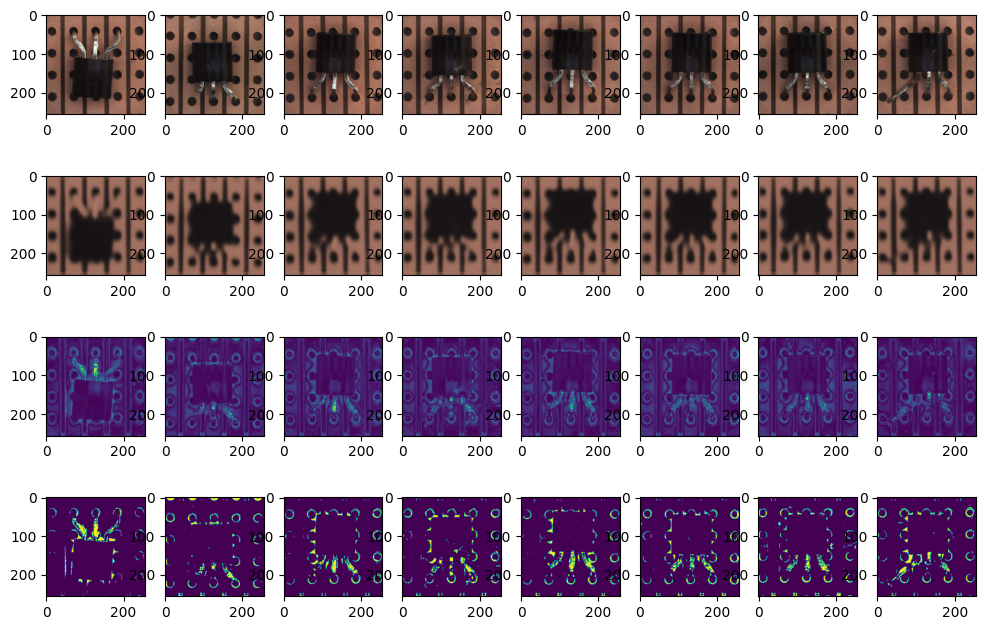

In [7]:
plt.clf()

fig, ax = plt.subplots(4,8, figsize=(12, 8))
for i in range(8):
    xi = x[i].detach()
    xhati = (out.others["x_recon"][i].detach()*0.5 + 0.5).clamp(0,1)
    alphai = out.alpha[i].abs().max(dim=0).values.detach()
    alphai_big = alphai > thresh[i]
    ax[0,i].imshow(xi.numpy().transpose(1,2,0))
    ax[1,i].imshow(xhati.numpy().transpose(1,2,0))
    ax[2,i].imshow(alphai.numpy())
    ax[3,i].imshow(alphai_big.numpy())
    